# Dual-axis Combo Chart in Python

This is a Notebook for the medium article [Creating a dual-axis Combo Chart in Python](https://bindichen.medium.com/creating-a-dual-axis-combo-chart-in-python-52624b187834)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

#### Version of packages used in this Notebook

In [1]:
import matplotlib as m
import numpy as np
import pandas as pd

# Make sure your package version >= them
print('matplotlib: ', m.__version__)
print('numpy: ', np.__version__)
print('pandas: ', pd.__version__)

matplotlib:  3.5.1
numpy:  1.18.1
pandas:  1.1.4


# Tutorial

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
plt.style.use('seaborn')
# Needed for jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Default figure size: 8 by 5
plt.rcParams['figure.figsize'] = (8, 5)

In [4]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
average_temp = [5.2, 5.3,7.6,9.9,13.3,16.5,18.7, 18.5, 15.7, 12.0, 8.0, 5.5]
average_percipitation_mm = [55.2, 40.9, 41.6, 43.7, 49.4, 45.1, 44.5, 49.5, 49.1, 68.5, 59.0, 55.2]

london_climate = pd.DataFrame(
  {
    'average_temp': average_temp,
    'average_percipitation_mm': average_percipitation_mm
  }, 
  index=x
)

london_climate

,average_temp,average_percipitation_mm
Jan,5.2,55.2
Feb,5.3,40.9
Mar,7.6,41.6
Apr,9.9,43.7
May,13.3,49.4
Jun,16.5,45.1
Jul,18.7,44.5
Aug,18.5,49.5
Sep,15.7,49.1
Oct,12.0,68.5


## 1. Problem using the same axis

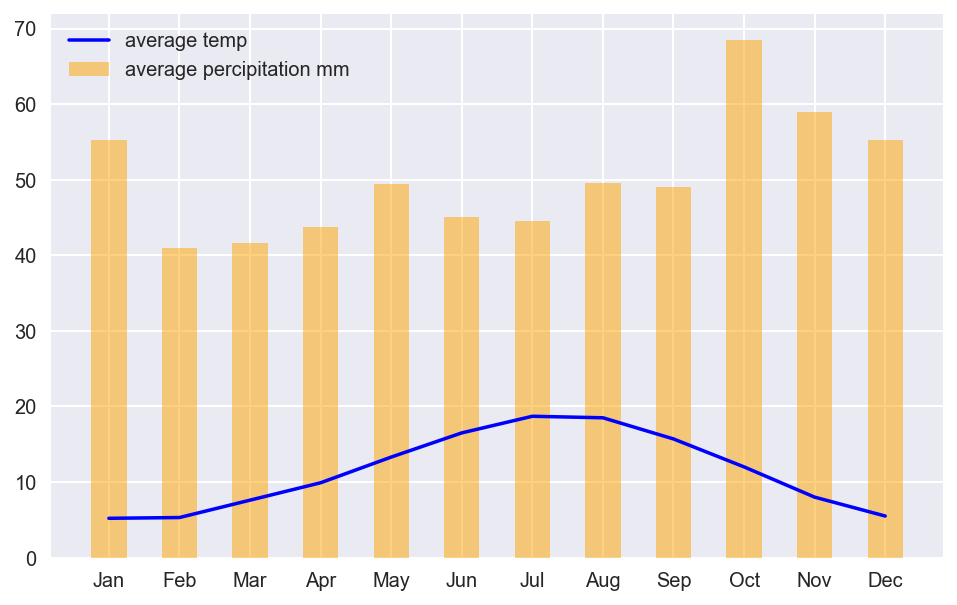

In [5]:
plt.plot(x, average_temp, "-b", label="average temp")
plt.bar(x, average_percipitation_mm, width=0.5, alpha=0.5, color='orange', label="average percipitation mm", )
plt.legend(loc="upper left")
plt.show()

## 2. Matplotlib - dual-axis combo chart

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

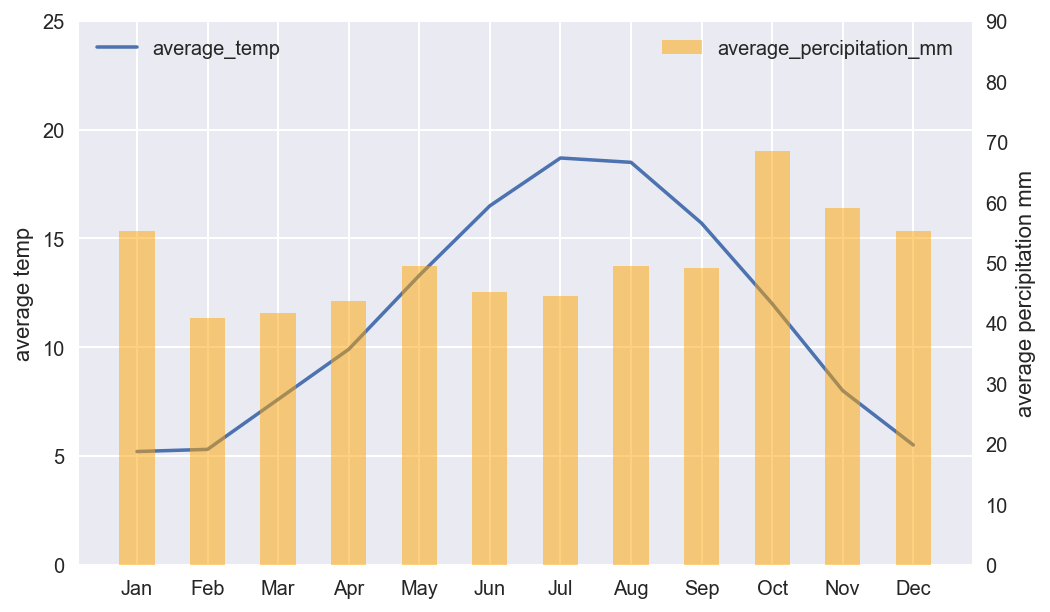

In [7]:
# Create figure and axis #1
fig, ax1 = plt.subplots()

# plot line chart on axis #1
ax1.plot(x, average_temp) 
ax1.set_ylabel('average temp')
ax1.set_ylim(0, 25)
ax1.legend(['average_temp'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx() 

# plot bar chart on axis #2
ax2.bar(x, average_percipitation_mm, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average percipitation mm')
ax2.set_ylim(0, 90)
ax2.legend(['average_percipitation_mm'], loc="upper right")

plt.show()

## 2. Seaborn - dual-axis combo chart

In [8]:
london_climate_df = london_climate.reset_index()

In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

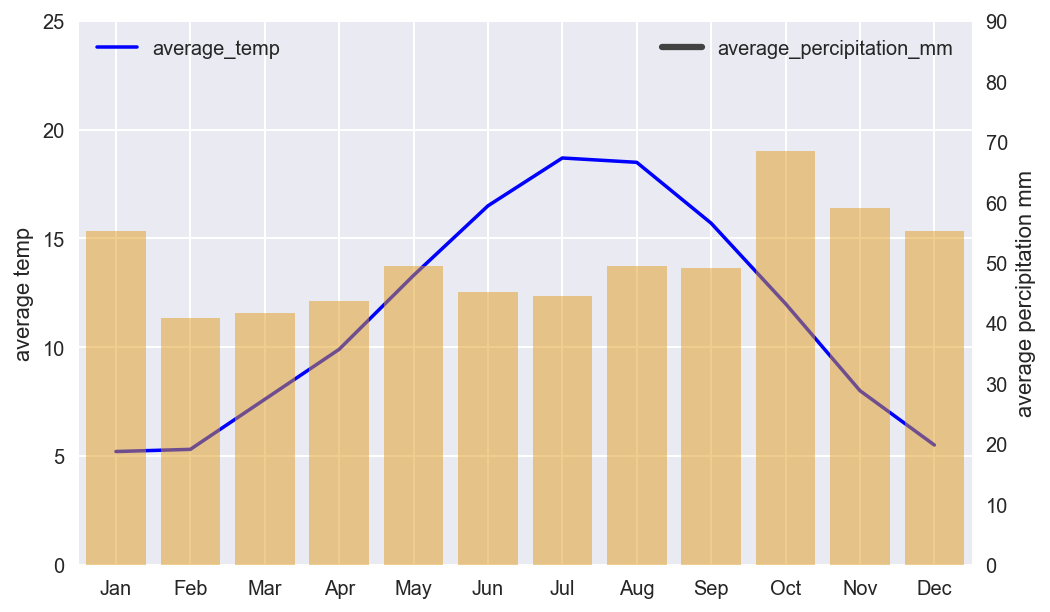

In [10]:
# plot line chart on axis #1
ax1 = sns.lineplot(
    x=london_climate.index, 
    y='average_temp', 
    data=london_climate, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('average temp')
ax1.set_ylim(0, 25)
ax1.legend(['average_temp'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx() 

# plot bar chart on axis #2
sns.barplot(
    x=london_climate.index, 
    y='average_percipitation_mm', 
    data=london_climate, 
    color='orange', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average percipitation mm')
ax2.set_ylim(0, 90)
ax2.legend(['average_percipitation_mm'], loc="upper right")

plt.show()

In [11]:
london_climate

,average_temp,average_percipitation_mm
Jan,5.2,55.2
Feb,5.3,40.9
Mar,7.6,41.6
Apr,9.9,43.7
May,13.3,49.4
Jun,16.5,45.1
Jul,18.7,44.5
Aug,18.5,49.5
Sep,15.7,49.1
Oct,12.0,68.5


### Fix legend color issue

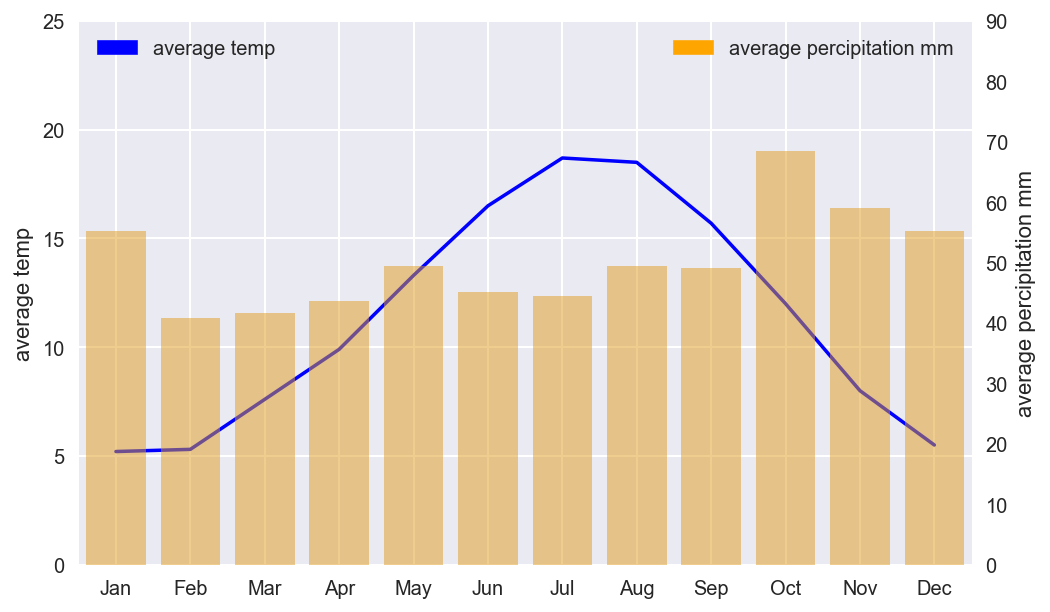

In [12]:
import matplotlib.patches as mpatches

# plot line chart on axis #1
ax1 = sns.lineplot(
    x=london_climate.index,
    y='average_temp', 
    data=london_climate, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('average temp')
ax1.set_ylim(0, 25)
ax1_patch = mpatches.Patch(color='blue', label='average temp')
ax1.legend(handles=[ax1_patch], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx() 

# plot bar chart on axis #2
sns.barplot(
    x=london_climate.index, 
    y='average_percipitation_mm', 
    data=london_climate, 
    color='orange', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average percipitation mm')
ax2.set_ylim(0, 90)
ax2_patch = mpatches.Patch(color='orange', label='average percipitation mm')
ax2.legend(handles=[ax2_patch], loc="upper right")

plt.show()

## 3. DataFrame plot

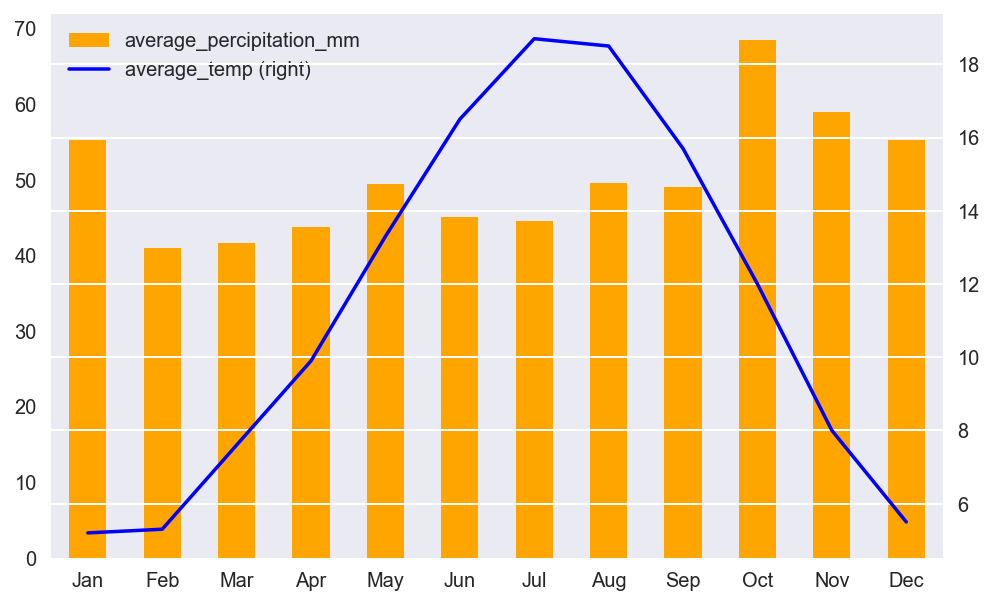

In [13]:
# Create the figure and axes object
fig, ax = plt.subplots()

# Plot the first x and y axes:
london_climate.plot(
    use_index=True, 
    kind='bar',
    y='average_percipitation_mm', 
    ax=ax, 
    color='orange'
) 

# Plot the second x and y axes. 
# By secondary_y = True a second y-axis is requested
london_climate.plot(
    use_index=True, 
    y='average_temp', 
    ax=ax, 
    secondary_y=True, 
    color='blue'
) 

plt.show()

## Thanks for reading

This is a Notebook for the medium article [Creating a dual-axis Combo Chart in Python](https://bindichen.medium.com/creating-a-dual-axis-combo-chart-in-python-52624b187834)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)